In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
prudential_df = pd.read_csv('Dummy-Data 1.csv')

## Exploratory Data Analysis

In [3]:
prudential_df.columns

Index(['AppID', 'Ins_Age', 'Ins_Gender', 'Ht', 'Wt', 'IssueDate'], dtype='object')

In [4]:
prudential_df.head(2)

,AppID,Ins_Age,Ins_Gender,Ht,Wt,IssueDate
0,56372,31,Male,510,185,NaN
1,34565,35,Male,510,205,NaN


In [5]:
prudential_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AppID       100 non-null    int64  
 1   Ins_Age     100 non-null    int64  
 2   Ins_Gender  100 non-null    object 
 3   Ht          100 non-null    int64  
 4   Wt          100 non-null    int64  
 5   IssueDate   0 non-null      float64
dtypes: float64(1), int64(4), object(1)
memory usage: 4.8+ KB


In [6]:
prudential_df.describe(include='all')

,AppID,Ins_Age,Ins_Gender,Ht,Wt,IssueDate
count,100.000000,100.000000,100,100.000000,100.00000,0.0
unique,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,Male,NaN,NaN,NaN
freq,NaN,NaN,63,NaN,NaN,NaN
mean,79455.570000,37.320000,NaN,527.720000,165.15000,NaN
std,31123.726942,12.103827,NaN,39.482787,27.66224,NaN
min,12123.000000,19.000000,NaN,500.000000,110.00000,NaN
25%,64296.000000,27.750000,NaN,506.000000,145.00000,NaN
50%,99444.500000,36.000000,NaN,509.000000,170.00000,NaN
75%,99917.000000,47.000000,NaN,511.000000,180.00000,NaN


In [7]:
prudential_df['Ins_Gender'].value_counts()

Male      63
Female    37
Name: Ins_Gender, dtype: int64

In [7]:
prudential_df.isnull().sum()

AppID           0
Ins_Age         0
Ins_Gender      0
Ht              0
Wt              0
IssueDate     100
dtype: int64

In [8]:
prudential_df.drop('IssueDate',inplace=True, axis=1)  #Drop Null column

### Univariate Analysis

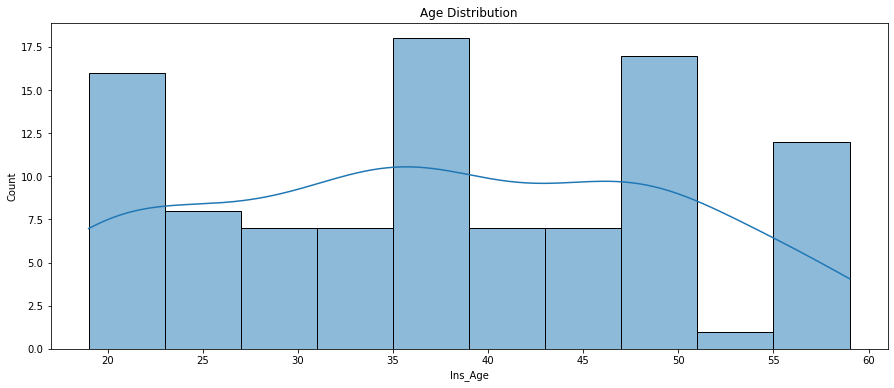

In [9]:
# Histogram and KDE plot for Age
plt.figure(figsize=(15, 6))
sns.histplot(prudential_df['Ins_Age'], kde=True, bins=10)
plt.title('Age Distribution')
plt.show()

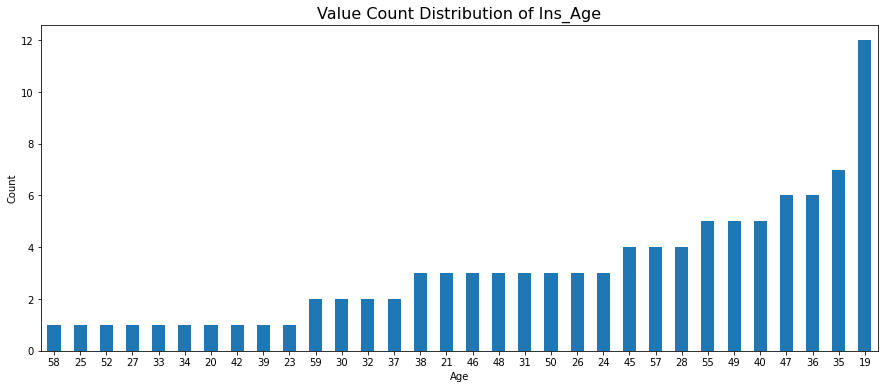

In [10]:
# Age counts plot
prudential_df['Ins_Age'].value_counts().sort_values().plot(kind='bar', figsize=(15, 6))
plt.title('Value Count Distribution of Ins_Age', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.show()

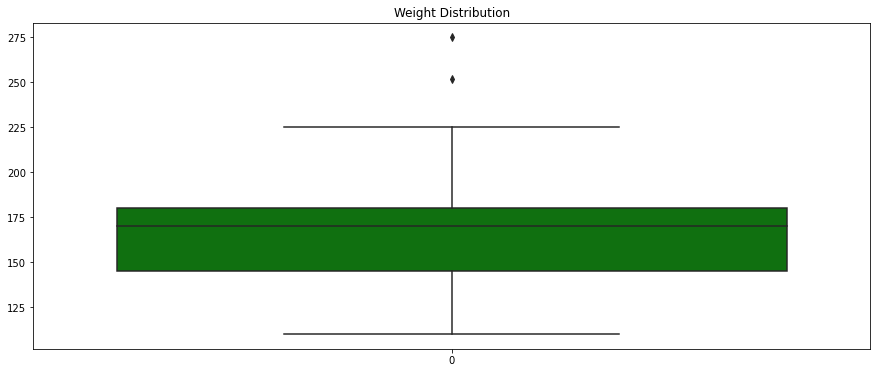

In [11]:
# Boxplot for Weight
plt.figure(figsize=(15, 6))
sns.boxplot(data=prudential_df['Wt'], color='green')
plt.title('Weight Distribution')
plt.show()

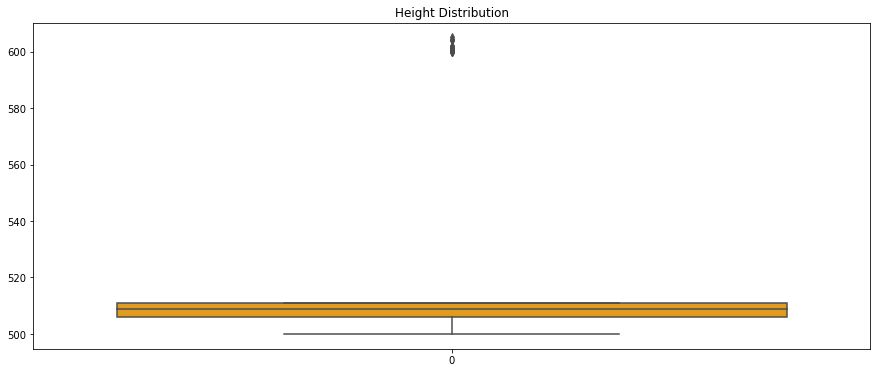

In [12]:
# Boxplot for Height
plt.figure(figsize=(15, 6))
sns.boxplot(data=prudential_df['Ht'], color='orange')
plt.title('Height Distribution')
plt.show()

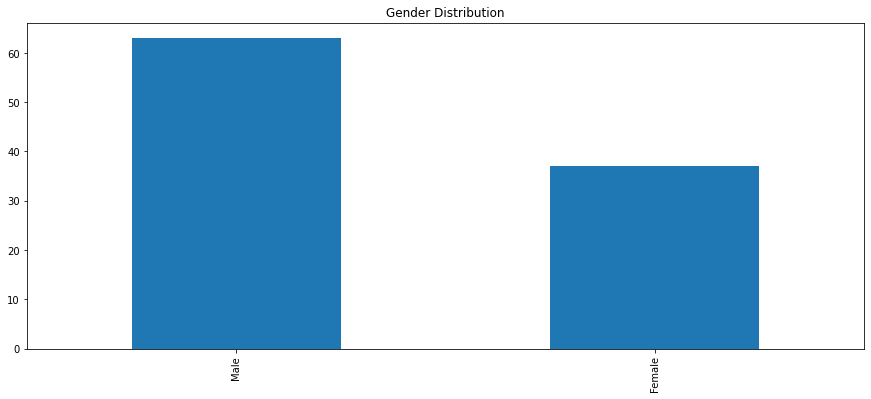

In [13]:
prudential_df['Ins_Gender'].value_counts().plot(kind='bar', figsize=(15, 6))
plt.title('Gender Distribution')
plt.show()

### Bivariate Analysis

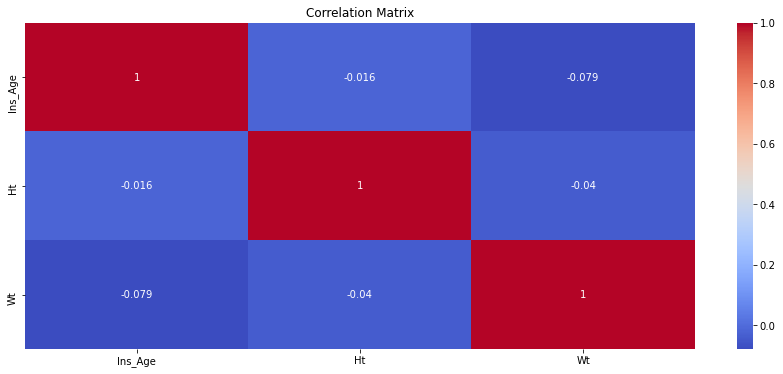

In [14]:
# Correlation heatmap
plt.figure(figsize=(15, 6))
corr = prudential_df[['Ins_Age', 'Ht', 'Wt']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

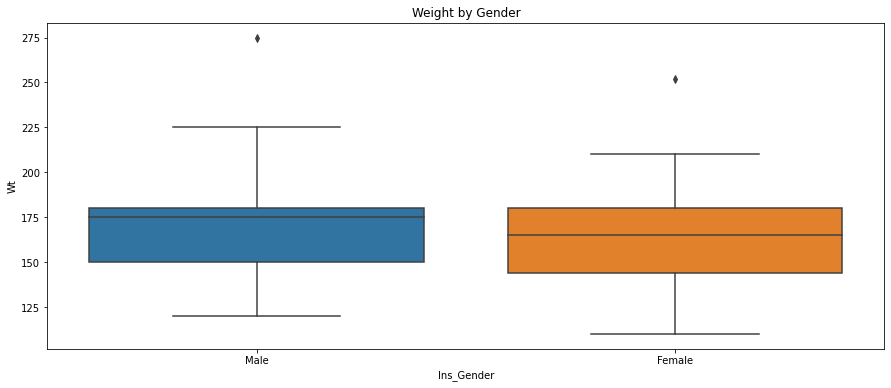

In [15]:
# Boxplot of Weight by Gender
plt.figure(figsize=(15, 6))
sns.boxplot(x='Ins_Gender', y='Wt', data=prudential_df)
plt.title('Weight by Gender')
plt.show()

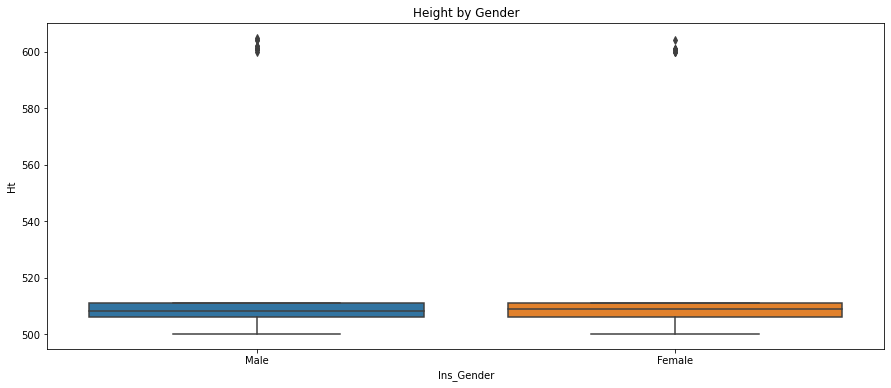

In [16]:
# Boxplot of Height by Gender
plt.figure(figsize=(15, 6))
sns.boxplot(x='Ins_Gender', y='Ht', data=prudential_df)
plt.title('Height by Gender')
plt.show()

### Outlier Detection

In [17]:
def detect_outliers_iqr(data, column):
    """
    Detects outliers in a DataFrame column using the IQR method.
    
    Parameters:
        data (pd.DataFrame): The DataFrame containing the data.
        column (str): The name of the column to analyze.
    
    Returns:
        pd.DataFrame: A DataFrame of rows with outliers.
    """
    Q1 = data[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = data[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    return outliers

In [18]:
age_outliers = detect_outliers_iqr(prudential_df, 'Ins_Age')
print("Outliers in Age:")
print(age_outliers)

Outliers in Age:
Empty DataFrame
Columns: [AppID, Ins_Age, Ins_Gender, Ht, Wt]
Index: []


In [19]:
weight_outliers=detect_outliers_iqr(prudential_df, 'Wt')
print("Outliers in weight:")
print(weight_outliers)

Outliers in weight:
    AppID  Ins_Age Ins_Gender   Ht   Wt
4   12323       39     Female  600  252
95  99511       35       Male  510  275


In [20]:
height_outliers = detect_outliers_iqr(prudential_df, 'Ht')
print("Outliers in height:")
print(height_outliers)

Outliers in height:
     AppID  Ins_Age Ins_Gender   Ht   Wt
4    12323       39     Female  600  252
8    63462       40     Female  600  155
11   45764       31     Female  601  200
26  100344       40       Male  601  140
28   13545       19     Female  601  170
31   93590       57     Female  601  170
33   93587       19       Male  601  180
39   99437       26       Male  601  133
40   99452       46       Male  601  180
47   64574       25       Male  601  160
48   75324       46     Female  601  180
55   99918       47       Male  602  160
56   99946       24       Male  604  180
57   13352       36     Female  600  120
65   99947       47       Male  602  120
66   13134       24     Female  604  150
67   54226       36       Male  600  180
80   93077       36       Male  601  121
81   99513       59       Male  601  180
84   34523       32       Male  601  125
91   99513       55       Male  605  180
96   23781       27       Male  604  145


#### In a typical maching learning modelling process, we need to treat the outliers by using different simple/statstical methods but here the nature of the probelm is a bit differnt so I am keeping the values

## Feature Engineering

In [21]:
def calculate_bmi(height, weight):
    
    # Extract feet and inches
    feet = height//100
    inches = height%100
    
    # Convert height to meters
    height_meters = (feet * 12 + inches) * 0.0254
    
     # Convert weight to kilograms
    weight_kg = weight * 0.453592
    #Calculate BMI
    bmi = round(weight_kg / (height_meters ** 2),2)
    return bmi

In [22]:
prudential_df["Ins_BMI"] = calculate_bmi(prudential_df["Ht"], prudential_df["Wt"])

In [23]:
prudential_df.head(2)

,AppID,Ins_Age,Ins_Gender,Ht,Wt,Ins_BMI
0,56372,31,Male,510,185,26.54
1,34565,35,Male,510,205,29.41


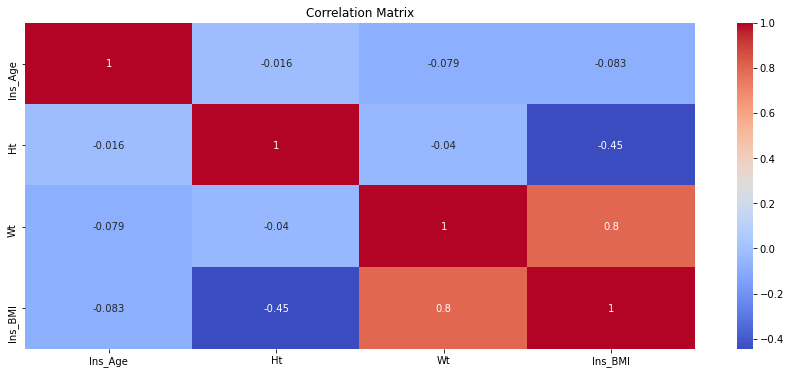

In [24]:
# Correlation heatmap, this time along with BMI
plt.figure(figsize=(15, 6))
corr = prudential_df[['Ins_Age', 'Ht', 'Wt', 'Ins_BMI']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Model Training

In [25]:
y = prudential_df['Ins_BMI']
X = prudential_df[['Ins_Age', 'Ins_Gender','Ht', 'Wt']]

In [26]:
# Data Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Ins_Age', 'Ht', 'Wt']),
        ('cat', OneHotEncoder(), ['Ins_Gender'])
    ]
)

In [27]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model 1: Linear Regression

In [28]:
lr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate Model
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse:.2f}, R-squared: {r2:.2f}")

Linear Regression MSE: 5.19, R-squared: 0.79


### Model 2: Random Forest Regression

In [29]:
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=10, random_state=42))
])

rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf:.2f}, R-squared: {r2_rf:.2f}")

Random Forest MSE: 2.25, R-squared: 0.91


### Model 3: XGBoost Regression

In [30]:
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
))
])

# Fit the model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - MSE: {mse_xgb:.2f}, R-squared: {r2_xgb:.2f}")

XGBoost - MSE: 0.62, R-squared: 0.98


#### Save the best model locally and then it will be uploaded into AWS S3

In [31]:
import joblib

# Save the pipeline (including the preprocessor and the trained XGBoost model)
joblib.dump(xgb_model, 'xgb_bmi_predictor.pkl')

# Verify saving and loading
loaded_xgb_model = joblib.load('xgb_bmi_predictor.pkl')
print("The model needs to be uploaded in AWS S3 !")

The model need to be uploaded in AWS S3 !


## Calculate Quote

In [32]:
# Apply business rules to determine quotes and reasons
def calculate_quote_amount_reason(age, gender, bmi):
    quote_reason = "BMI is in right range"
    if 18 <= age <= 39 and (bmi < 17.49 or bmi > 38.5):
        quote_amount = 750
        quote_reason = "Age is between 18 to 39 and BMI is either less than 17.49 or greater than 38.5"
    elif 40 <= age <= 59 and (bmi < 18.49 or bmi > 38.5):
        quote_amount = 1000
        quote_reason = "Age is between 40 to 59 and BMI is either less than 18.49 or greater than 38.5"
    elif age > 60 and (bmi < 18.49 or bmi > 45.5):
        quote_amount = 2000
        quote_reason = "Age is greater than 60 and BMI is either less than 18.49 or greater than 45.5"
    else:
        quote_amount = 500
    
    # Apply gender discount
    if gender == "Female":
        quote_amount *= 0.9  # 10% discount

    return quote_amount, quote_reason

In [33]:
# Add Quote and Reason columns
prudential_df[["Ins_Quote", "Ins_Reason"]] = prudential_df.apply(
    lambda row: calculate_quote_amount_reason(row["Ins_Age"], row["Ins_Gender"], row["Ins_BMI"]), axis=1, result_type="expand")

In [34]:
prudential_df

,AppID,Ins_Age,Ins_Gender,Ht,Wt,Ins_BMI,Ins_Quote,Ins_Reason
0,56372,31,Male,510,185,26.54,500.0,BMI is in right range
1,34565,35,Male,510,205,29.41,500.0,BMI is in right range
2,57732,45,Female,510,125,17.94,900.0,Age is between 40 to 59 and BMI is either less...
3,87324,38,Male,503,175,31.00,500.0,BMI is in right range
4,12323,39,Female,600,252,34.18,450.0,BMI is in right range
...,...,...,...,...,...,...,...,...
95,99511,35,Male,510,275,39.46,750.0,Age is between 18 to 39 and BMI is either less...
96,23781,27,Male,604,145,17.65,500.0,BMI is in right range
97,99517,35,Female,507,190,29.76,450.0,BMI is in right range
98,99520,38,Female,510,144,20.66,450.0,BMI is in right range


## AWS Architecture

![Architecture Diagram](./AWS_Architecture.png)

## Rule-Based/Non-Machine learning Solution

In [35]:
import json

def lambda_handler(event, context):
    # Parse input from API Gateway
    age = event["age"]
    gender = event["gender"]
    height = event["height"]
    weight = event["weight"]

    # BMI Calculation
    feet, inches = divmod(height, 100)
    height_meters = (feet * 12 + inches) * 0.0254
    weight_kg = weight * 0.453592
    bmi = weight_kg / (height_meters ** 2)

    # Apply business rules
    def assign_quote(age, gender, bmi):
        reason = "BMI is in right range"
        if 18 <= age <= 39 and (bmi < 17.49 or bmi > 38.5):
            quote = 750
            reason = "Age is between 18 to 39 and BMI is either less than 17.49 or greater than 38.5"
        elif 40 <= age <= 59 and (bmi < 18.49 or bmi > 38.5):
            quote = 1000
            reason = "Age is between 40 to 59 and BMI is either less than 18.49 or greater than 38.5"
        elif age > 60 and (bmi < 18.49 or bmi > 45.5):
            quote = 2000
            reason = "Age is greater than 60 and BMI is either less than 18.49 or greater than 45.5"
        else:
            quote = 500
        
        if gender == "Female":
            quote *= 0.9
        return quote, reason

    quote, reason = assign_quote(age, gender, bmi)
    
    # Return response
    return {
        "statusCode": 200,
        "body": json.dumps({
            "bmi": bmi,
            "quote": quote,
            "reason": reason
        })
    }


#### Personally I don't think machine learning is required for this problem as the rules are already determined and the above given BMI and quote calculator should do the job.